# Simple model of epidemic dynamics: SIR
### Prof. Marco Arieli Herrera-Valdez, 
#### Facultad de Ciencias, Universidad Nacional Autónoma de México
Created March 7, 2016


Let $x$, $y$, and $z$ represent the fraction of susceptibles, infected, and recovered individuals within a population. Assume homogeneous mixing with a probability of infection given a contact with an infected individual given by $\beta$ and an average removal time $\beta^{-1}$ from the infected group, by recovery or death due to infection. The population dynamics are given by
\begin{eqnarray}
\partial_t x &=& -\alpha xy
\\
\partial_t y &=& \left( \alpha x - \beta \right) y
\\
\partial_t x &=& \beta y
\end{eqnarray}

Notice that the population size does not matter because it is kept constant. 

In [23]:
#Import the necessary modules and perform the necessary tests
import scipy as sc
import pylab as gr
sc.test("all",verbose=0)
%matplotlib inline

Running unit tests for scipy
NumPy version 1.10.4
NumPy relaxed strides checking option: False
NumPy is installed in /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy
SciPy version 0.17.0
SciPy is installed in /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy
Python version 3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
nose version 1.3.7


----------------------------------------------------------------------
Ran 1 test in 2.492s

OK


Setup a python function that specifies the dynamics

In [31]:
def SIR(U,t,p):
    x,y,z=U
    yNew= p["alpha"] * y * x
    zNew= p["beta"] * y 
    dx = -yNew
    dy = yNew - zNew
    dz = zNew
    return dx, dy, dz

The function SIR above takes three arguments, $U$, $t$, and $p$ that represent the states of the system, the time and the parameters, respectively. 

### Outbreak condition

The condition 
\begin{equation}
\frac{\alpha}{\beta}x(t)>1 , \quad y>0
\end{equation}
defines a threshold for a full epidemic outbreak. An equivalent condition is 
\begin{equation}
x>\frac{\beta}{\alpha }, \quad y>0
\end{equation}

Therefore, with the parameters $(\alpha,\beta)$=(0.5,0.1), there will be an outbreak if the initial condition for $x(t)>1/5$ with $y>0$. 
Notice that the initial value for $z$ can be interpreted as the initial proportion of immune individuals within the population. 

The dynamics related to the oubreak condition can be studied by defining a variable $B(t) = x(t) \alpha/\beta$, called by some authors "_effective reproductive number_". If $x(t)\approx 1$, the corresponding $B(t)$ is called "_basic reproductive number_", or $R_o$.

Let's define a python dictionary containing parameters and initial conditions to perform simulations.

In [74]:
p={"alpha": 0.15, "beta":0.1, "timeStop":300.0, "timeStep":0.01 }
p["Ro"]=p["alpha"]/p["beta"]
p["sampTimes"]= sc.arange(0,p["timeStop"],p["timeStep"])
N= 1e4; i0= 1e1; r0=0; s0=N-i0-r0
x0=s0/N; y0=i0/N; z0=r0/N;
p["ic"]=[x0,y0,z0]
print("N=%g with initial conditions (S,I,R)=(%g,%g,%g)"%(N,s0,i0,r0))
print("Initial conditions: ", p["ic"])
print("B(0)=%g"%(p["ic"][0]*p["Ro"]))

N=10000 with initial conditions (S,I,R)=(9990,10,0)
Initial conditions:  [0.999, 0.001, 0.0]
B(0)=1.4985


Integrate numerically and plot the results

In [75]:
# Numerical integration
xyz= sc.integrate.odeint(SIR, p["ic"], p["sampTimes"], args=(p,)).transpose()
# Calculate the outbreak indicator
B= xyz[0]*p["alpha"]/p["beta"]

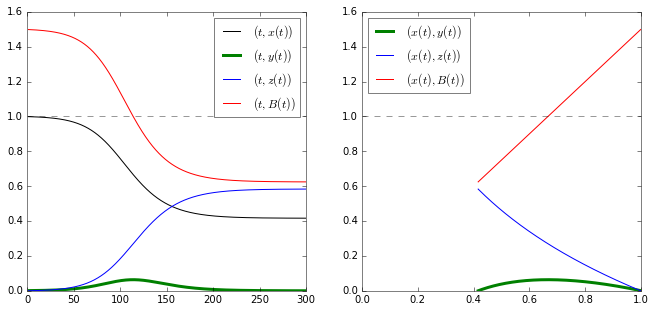

In [76]:
# Figure
fig=gr.figure(figsize=(11,5))
gr.ioff()
rows=1; cols=2
ax=list()
for n in sc.arange(rows*cols):
    ax.append(fig.add_subplot(rows,cols,n+1))

ax[0].plot(p["sampTimes"], xyz[0], 'k', label=r"$(t,x(t))$")
ax[0].plot(p["sampTimes"], xyz[1], 'g', lw=3, label=r"$(t,y(t))$")
ax[0].plot(p["sampTimes"], xyz[2], 'b', label=r"$(t,z(t))$")
ax[0].plot(p["sampTimes"], B, 'r', label=r"$(t,B(t))$")
ax[0].plot([0, p["timeStop"]], [1,1], 'k--', alpha=0.4)
ax[1].plot(xyz[0], xyz[1], 'g', lw=3, label=r"$(x(t),y(t))$")
ax[1].plot(xyz[0], xyz[2], 'b', label=r"$(x(t),z(t))$")
ax[1].plot(xyz[0], B, 'r', label=r"$(x(t),B(t))$")
ax[1].plot([0, 1], [1,1], 'k--', alpha=0.4)
ax[0].legend(); ax[1].legend(loc="upper left")
gr.ion(); gr.draw()

Notice that $y$ reaches its maximum when $B(t)$ crosses 1. That is, the epidemic starts to wine down when the $B(t)<1$. 

### Exercises:
Setup two simulations for which there is no outbreak, such that:

(a) The initial density of "immune" individuals is large enough to prevent an epidemic.

(b) The initial density of "immune" individuals is really small but there is no epidemic outbreak.